<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_0_4_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n20.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,3.283954,131.226495,127.517150,3.709345
1,0.0,1.0,47.067808,95.047509,91.779690,-9.727867,234.167141,247.435849,-13.268709
2,0.0,2.0,99.291665,61.179446,95.992578,-0.319245,266.144445,269.288026,-3.143581
3,0.0,3.0,36.059748,81.961304,62.806562,2.153734,192.981348,192.760613,0.220735
4,0.0,4.0,22.561835,57.403703,99.891733,-5.000277,184.856994,192.737508,-7.880514
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,3.753779,123.806065,121.235413,2.570653
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.594549,230.298920,231.049588,-0.750669
29997,999.0,27.0,28.102838,93.083445,72.411123,-2.549224,201.048182,201.769492,-0.721310
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.948346,115.332753,118.280855,-2.948102


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,3.283954,131.226495,127.517150,3.709345
1,0.0,1.0,47.067808,95.047509,91.779690,-9.727867,234.167141,247.435849,-13.268709
2,0.0,2.0,99.291665,61.179446,95.992578,-0.319245,266.144445,269.288026,-3.143581
3,0.0,3.0,36.059748,81.961304,62.806562,2.153734,192.981348,192.760613,0.220735
4,0.0,4.0,22.561835,57.403703,99.891733,-5.000277,184.856994,192.737508,-7.880514
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,3.753779,123.806065,121.235413,2.570653
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.594549,230.298920,231.049588,-0.750669
29997,999.0,27.0,28.102838,93.083445,72.411123,-2.549224,201.048182,201.769492,-0.721310
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.948346,115.332753,118.280855,-2.948102


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    44.623839  37.451801  35.866901  ...  131.226495  127.517150   3.709345
      1.0    47.067808  95.047509  91.779690  ...  234.167141  247.435849 -13.268709
      2.0    99.291665  61.179446  95.992578  ...  266.144445  269.288026  -3.143581
      3.0    36.059748  81.961304  62.806562  ...  192.981348  192.760613   0.220735
      4.0    22.561835  57.403703  99.891733  ...  184.856994  192.737508  -7.880514
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   22.165046  31.666469  56.220772  ...  123.806065  121.235413   2.570653
      26.0   93.324773  99.972234  27.596461  ...  230.298920  231.049588  -0.750669
      27.0   28.102838  93.083445  72.411123  ...  201.048182  201.769492  -0.721310
      28.0   30.257867  20.848863  55.174370  ...  115.332753  118.280855  -2.948102
      29.0   90.716789  93.036058  71.241563  ...  272.869436  265.198657   7.670779

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    44.623839  37.451801  35.866901  ...  131.226495  127.517150   3.709345
      1.0    47.067808  95.047509  91.779690  ...  234.167141  247.435849 -13.268709
      2.0    99.291665  61.179446  95.992578  ...  266.144445  269.288026  -3.143581
      3.0    36.059748  81.961304  62.806562  ...  192.981348  192.760613   0.220735
      4.0    22.561835  57.403703  99.891733  ...  184.856994  192.737508  -7.880514
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   22.165046  31.666469  56.220772  ...  123.806065  121.235413   2.570653
      26.0   93.324773  99.972234  27.596461  ...  230.298920  231.049588  -0.750669
      27.0   28.102838  93.083445  72.411123  ...  201.048182  201.769492  -0.721310
      28.0   30.257867  20.848863  55.174370  ...  115.332753  118.280855  -2.948102
      29.0   90.716789  93.036058  71.241563  ...  272.869436  265.198657   7.670779

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,3.283954,131.226495,127.517150,3.709345
1,0.0,1.0,47.067808,95.047509,91.779690,-9.727867,234.167141,247.435849,-13.268709
2,0.0,2.0,99.291665,61.179446,95.992578,-0.319245,266.144445,269.288026,-3.143581
3,0.0,3.0,36.059748,81.961304,62.806562,2.153734,192.981348,192.760613,0.220735
4,0.0,4.0,22.561835,57.403703,99.891733,-5.000277,184.856994,192.737508,-7.880514
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,3.753779,123.806065,121.235413,2.570653
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.594549,230.298920,231.049588,-0.750669
29997,999.0,27.0,28.102838,93.083445,72.411123,-2.549224,201.048182,201.769492,-0.721310
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.948346,115.332753,118.280855,-2.948102


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    44.623839  37.451801  35.866901  ...  131.226495  127.517150   3.709345
      1.0    47.067808  95.047509  91.779690  ...  234.167141  247.435849 -13.268709
      2.0    99.291665  61.179446  95.992578  ...  266.144445  269.288026  -3.143581
      3.0    36.059748  81.961304  62.806562  ...  192.981348  192.760613   0.220735
      4.0    22.561835  57.403703  99.891733  ...  184.856994  192.737508  -7.880514
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   22.165046  31.666469  56.220772  ...  123.806065  121.235413   2.570653
      26.0   93.324773  99.972234  27.596461  ...  230.298920  231.049588  -0.750669
      27.0   28.102838  93.083445  72.411123  ...  201.048182  201.769492  -0.721310
      28.0   30.257867  20.848863  55.174370  ...  115.332753  118.280855  -2.948102
      29.0   90.716789  93.036058  71.241563  ...  272.869436  265.198657   7.670779

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

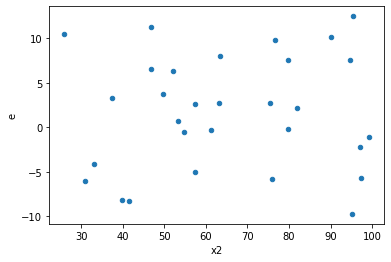

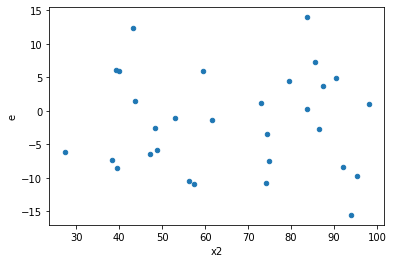

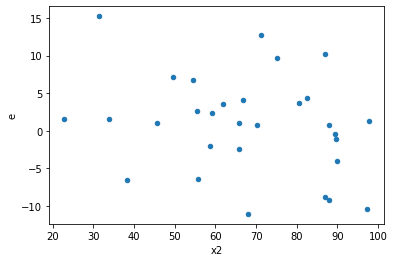

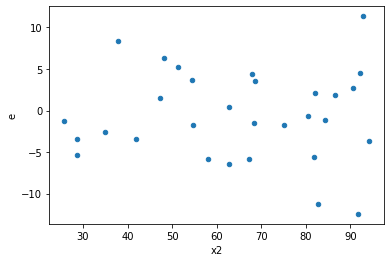

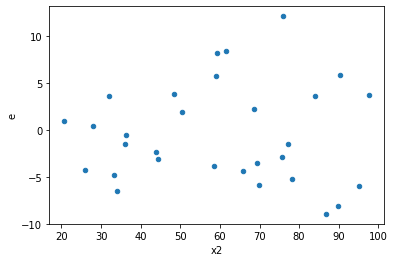

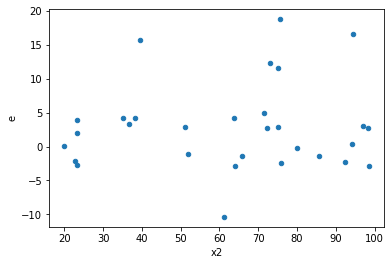

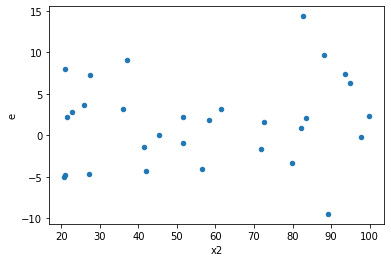

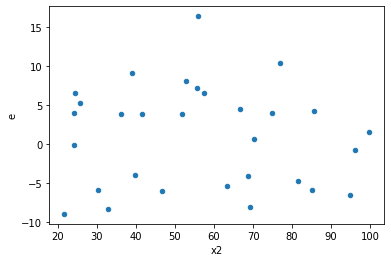

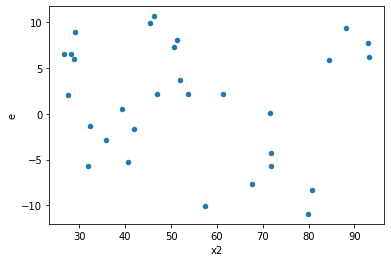

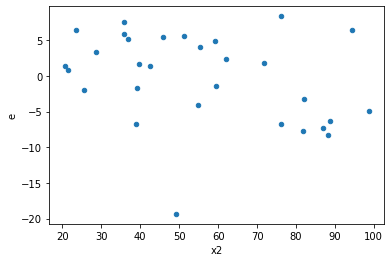

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,502.10784769400465,355.26113303401604,62.76348096175058,44.407641629252005,1.4133486638571526,0.6145841661571048,0.6927079169214476,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,485.87825965746975,345.69661866415953,60.73478245718372,43.21207733301994,1.4055048080452737,0.6202624666073173,0.6898687666963413,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,406.0824809315813,134.35039344922708,50.76031011644766,16.793799181153386,3.0225626476117884,0.11493681577774528,0.9425315921111274,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,445.3949585019053,114.48405144114831,55.67436981273816,14.310506430143539,3.8904541977260916,0.05550783387034097,0.9722460830648295,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,578.3641754361397,222.6776118388602,72.29552192951746,27.834701479857525,2.5973162306710504,0.171266176315094,0.914366911842453,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,300.5241258079746,278.3997090589465,37.565515725996825,34.79996363236831,1.0794699707977915,0.9111755292309929,0.5444122353845036,Reject005=1 : Homoscedasticity
9.0,9.0,9.0,305.0814786184204,149.99908255116148,38.13518482730255,18.749885318895185,2.033888964049921,0.30510955678816387,0.8474452216059181,Reject005=1 : Homoscedasticity
10.0,9.0,9.0,473.47602670809204,109.56152324840022,59.184503338511504,13.695190406050028,4.321553887441096,0.040114730598792336,0.9799426347006038,Reject005=0 : Heteroscedasticity
11.0,9.0,9.0,1057.0109513825237,157.83818479004555,132.12636892281546,19.729773098755693,6.696801238487042,0.009199226279132278,0.9954003868604339,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,502.10784769400465,355.26113303401604,62.76348096175058,44.407641629252005,1.4133486638571526,1.3854158338428952,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,485.87825965746975,345.69661866415953,60.73478245718372,43.21207733301994,1.4055048080452737,1.3797375333926827,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,268.82964295178726,374.3831915414402,33.60370536897341,46.79789894268003,0.7180601293688974,0.629696223067454,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,406.0824809315813,134.35039344922708,50.76031011644766,16.793799181153386,3.0225626476117884,0.11493681577774528,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,445.3949585019053,114.48405144114831,55.67436981273816,14.310506430143539,3.8904541977260916,0.05550783387034097,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,578.3641754361397,222.6776118388602,72.29552192951746,27.834701479857525,2.5973162306710504,0.171266176315094,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,300.5241258079746,278.3997090589465,37.565515725996825,34.79996363236831,1.0794699707977915,1.0888244707690071,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,235.80503508412463,391.85291266198857,29.475629385515578,48.98161408274857,0.6017692543924754,0.46101156785051256,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,238.96887106535854,306.79846551515567,29.871108883169818,38.34980818939446,0.7789115589743835,0.7157974962613676,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      868
Reject005=0 : Heteroscedasticity    132
Name: Result_test, dtype: int64